<a href="https://colab.research.google.com/github/Tessellate-Imaging/Monk_Object_Detection/blob/master/example_notebooks/4_efficientdet/Example%20-%20Object%20Detection%20in%20low%20lighting%20conditions.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# About the network

1. Paper on EfficientDet: https://arxiv.org/abs/1911.09070

2. Blog 1 on EfficientDet: https://towardsdatascience.com/efficientdet-scalable-and-efficient-object-detection-review-4472ffc34fd9

3. Blog 2 on EfficientDet: https://medium.com/@nainaakash012/efficientdet-scalable-and-efficient-object-detection-ea05ccd28427

# Table of contents


## 1. Installation Instructions



## 2. Use trained model to detect objects in low lighting conditions



## 3. How to train using ExDark Dataset


# Installation

 - Run these commands
     
     - git clone https://github.com/Tessellate-Imaging/Monk_Object_Detection.git
     
     - cd Monk_Object_Detection/4_efficientdet/installation
     
 - Select the right requirements file and run
 
     - cat requirements.txt | xargs -n 1 -L 1 pip install

In [1]:
! git clone https://github.com/Tessellate-Imaging/Monk_Object_Detection.git

Cloning into 'Monk_Object_Detection'...
remote: Enumerating objects: 32, done.
remote: Counting objects: 100% (32/32), done.
remote: Compressing objects: 100% (25/25), done.
remote: Total 3683 (delta 12), reused 14 (delta 7), pack-reused 3651
Receiving objects: 100% (3683/3683), 132.08 MiB | 730.00 KiB/s, done.
Resolving deltas: 100% (749/749), done.
Checking out files: 100% (4032/4032), done.


In [ ]:
# For colab use the command below
! cd Monk_Object_Detection/3_mxrcnn/installation && cat requirements_colab.txt | xargs -n 1 -L 1 pip install

# For Local systems and cloud select the right CUDA version
#! cd Monk_Object_Detection/3_mxrcnn/installation && cat requirements_cuda9.0.txt | xargs -n 1 -L 1 pip install

# Use already trained model for demo

In [3]:
# Import library

import os
import sys
sys.path.append("Monk_Object_Detection/4_efficientdet/lib/");

from infer_detector import Infer

Monk_Object_Detection/4_efficientdet/lib/infer_detector.py:12: TqdmExperimentalWarning: Using `tqdm.autonotebook.tqdm` in notebook mode. Use `tqdm.tqdm` instead to force console mode (e.g. in jupyter console)
  from tqdm.autonotebook import tqdm


In [4]:
gtf = Infer();

In [2]:
# Download trained model

In [ ]:
! wget --load-cookies /tmp/cookies.txt "https://docs.google.com/uc?export=download&confirm=$(wget --save-cookies /tmp/cookies.txt --keep-session-cookies --no-check-certificate 'https://docs.google.com/uc?export=download&id=13sgDPRQNT81PUGjihz_l9DAFs2QrSzAF' -O- | sed -rn 's/.*confirm=([0-9A-Za-z_]+).*/\1\n/p')&id=13sgDPRQNT81PUGjihz_l9DAFs2QrSzAF" -O exdark_trained.zip && rm -rf /tmp/cookies.txt

In [ ]:
! unzip -qq exdark_trained.zip

In [ ]:
# Load the model

In [5]:
gtf.Model(model_dir="exdark_trained/")

In [6]:
f = open("exdark_trained/classes.txt", 'r');
class_list = f.readlines();
f.close();
for i in range(len(class_list)):
    class_list[i] = class_list[i][:-1]

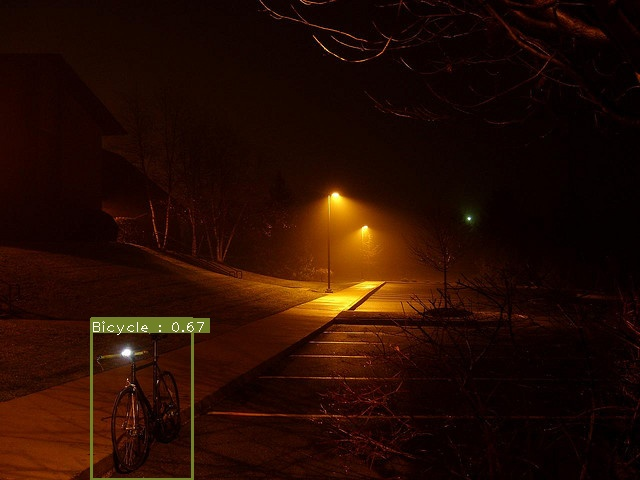

In [7]:
img_path = "Monk_Object_Detection/example_notebooks/sample_dataset/dark_scenes_test/img1.jpg";
scores, labels, boxes = gtf.Predict(img_path, class_list, vis_threshold=0.4);

from IPython.display import Image
Image(filename='output.jpg')

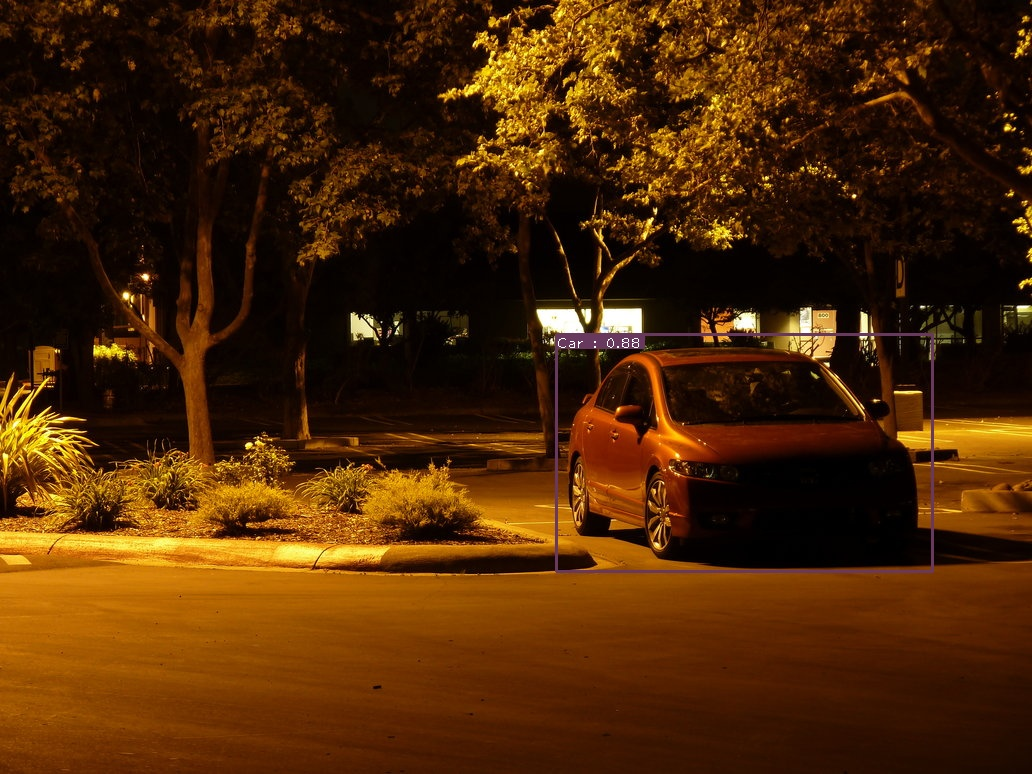

In [9]:
img_path = "Monk_Object_Detection/example_notebooks/sample_dataset/dark_scenes_test/img3.jpg";
scores, labels, boxes = gtf.Predict(img_path, class_list, vis_threshold=0.4);

from IPython.display import Image
Image(filename='output.jpg')

# Train your own model

## Dataset

    Credits: https://github.com/cs-chan/Exclusively-Dark-Image-Dataset

In [ ]:
! wget http://web.fsktm.um.edu.my/~cschan/source/CVIU/ExDark.zip

In [ ]:
! wget --no-check-certificate 'https://docs.google.com/uc?export=download&id=1FfEuDUdRbOFTtL8GioPceFghshMvfX7S' -O ExDark_Annno.zip

In [ ]:
# Extract dataset

In [1]:
import os
import sys

In [2]:
if(not os.path.isdir("Dark")):
    os.mkdir("Dark");
    os.mkdir("Dark/Images/");
    os.mkdir("Dark/Annotations/");

In [ ]:
!unzip -q ExDark.zip -d Dark/Images/

In [ ]:
!unzip -q ExDark_Annno.zip -d Dark/Annotations/

In [ ]:
! rm -r Dark/Annotations/__MACOSX

In [ ]:
! rm -r Dark/Images/__MACOSX

# Current Format

## Dataset Directory Structure

        Dark (root_dir)
          |
          |------Images (img_dir) 
          |         |
          |         |----Bicycle
          |                 |
          |                 |---------img1.jpg
          |                 |---------img2.jpg
          |                 |---------..........(and so on)
          |
          |         |-----Boat
          |                 |
          |                 |---------img1.jpg
          |                 |---------img2.jpg
          |                 |---------..........(and so on)
          |
          |         |-----...........(and so on)
          |
          |
          |
          |------Annotations (anno_dir) 
          |         |
          |         |----Bicycle
          |                 |
          |                 |---------img1.jpg.txt
          |                 |---------img2.jpg.txt
          |                 |---------..........(and so on)
          |
          |         |-----Boat
          |                 |
          |                 |---------img1.jpg.txt
          |                 |---------img2.jpg.txt
          |                 |---------..........(and so on)
          |
          |         |------............(and so on)

# Monk Format

## Dataset Directory Structure

        Dark (root)
          |
          |------Images (img_dir)
          |         |
          |         |----Bicycle
          |                 |
          |                 |---------img1.jpg
          |                 |---------img2.jpg
          |                 |---------..........(and so on)
          |
          |         |-----Boat
          |                 |
          |                 |---------img1.jpg
          |                 |---------img2.jpg
          |                 |---------..........(and so on)
          |
          |         |-----...........(and so on)
          |
          |
          |------train_labels.csv (anno_file)
          
          
## Annotation file format

           | Id         | Labels                                 |
           | img1.jpg   | x1 y1 x2 y2 label1 x1 y1 x2 y2 label2  |
           
- Labels:  xmin ymin xmax ymax label
- xmin, ymin - top left corner of bounding box

# COCO Format - 2

## Dataset Directory Structure

         ./ (root_dir)
          |
          |------Dark (coco_dir) 
                  |
                  |------Images (set_dir)
                  |         |
                  |         |----Bicycle
                  |                 |
                  |                 |---------img1.jpg
                  |                 |---------img2.jpg
                  |                 |---------..........(and so on)
                  |
                  |         |-----Boat
                  |                 |
                  |                 |---------img1.jpg
                  |                 |---------img2.jpg
                  |                 |---------..........(and so on)
                  |
                  |         |-----...........(and so on)
                  |
                  |
                  |
                  |------annotations 
                  |----------|
                             |--------------------instances_Images.json  (instances_<set_dir>.json)
                             |--------------------classes.txt
          
          
 - instances_Train.json -> In proper COCO format
 - classes.txt          -> A list of classes in alphabetical order
 
 For TrainSet
 - root_dir = "./";
 - coco_dir = "Dark";
 - img_dir = "./";
 - set_dir = "Images";

 
 Note: Annotation file name too coincides against the set_dir

# Current format to Monk Format

In [4]:
anno_dir = "Dark/Annotations/";
img_dir = "Dark/Images/";

In [5]:
folders = os.listdir(anno_dir);
folders = sorted(folders);

In [8]:
classes_list = folders

In [9]:
from tqdm.notebook import tqdm

In [10]:
combined = [];
for i in tqdm(range(len(folders))):
    files = os.listdir(anno_dir + "/" + folders[i]);
    for j in range(len(files)):
        fname = anno_dir + "/" + folders[i] + "/" + files[j];
        f = open(fname, 'r');
        lines = f.readlines();
        f.close();
        anno = [folders[i] + "/" + ".".join(files[j].split(".")[:-1])]
        wr = "";
        for k in range(1, len(lines)):
            tmp = lines[k].split(" ");
            label = folders[i];
            x1 = int(tmp[1]);
            y1 = int(tmp[2]);
            x2 = x1 + int(tmp[3]);
            y2 = y1 + int(tmp[4]);
            wr += str(x1) + " " + str(y1) + " " + str(x2) + " " + str(y2) + " " + label + " ";
        wr = wr[:-1];
        if(wr != ""):
            anno.append(wr);
            combined.append(anno);

In [12]:
import pandas as pd

In [13]:
df = pd.DataFrame(combined, columns = ['Id', 'Labels']);  

In [14]:
df.to_csv("Dark/train_labels.csv", index=False);

# Monk to Coco Type

In [16]:
import os
import numpy as np 
import cv2
import dicttoxml
import xml.etree.ElementTree as ET
from xml.dom.minidom import parseString
from tqdm import tqdm
import shutil
import json
import pandas as pd

In [17]:
root = "Dark/";
img_dir = "Images/";
anno_file = "train_labels.csv";

In [18]:
# Need not change anything below

In [19]:
dataset_path = root;
images_folder = root + "/" + img_dir;
annotations_path = root + "/annotations/";

In [20]:
if not os.path.isdir(annotations_path):
    os.mkdir(annotations_path)
    
input_images_folder = images_folder;
input_annotations_path = root + "/" + anno_file;

In [21]:
output_dataset_path = root;
output_image_folder = input_images_folder;
output_annotation_folder = annotations_path;

tmp = img_dir.replace("/", "");
output_annotation_file = output_annotation_folder + "/instances_" + tmp + ".json";
output_classes_file = output_annotation_folder + "/classes.txt";

In [22]:
if not os.path.isdir(output_annotation_folder):
    os.mkdir(output_annotation_folder);

In [23]:
df = pd.read_csv(input_annotations_path);
columns = df.columns

In [24]:
delimiter = " ";

In [25]:
list_dict = [];
anno = [];
for i in range(len(df)):
    img_name = df[columns[0]][i];
    labels = df[columns[1]][i];
    tmp = labels.split(delimiter);
    for j in range(len(tmp)//5):
        label = tmp[j*5+4];
        if(label not in anno):
            anno.append(label);
    anno = sorted(anno)
    
for i in tqdm(range(len(anno))):
    tmp = {};
    tmp["supercategory"] = "master";
    tmp["id"] = i;
    tmp["name"] = anno[i];
    list_dict.append(tmp);

anno_f = open(output_classes_file, 'w');
for i in range(len(anno)):
    anno_f.write(anno[i] + "\n");
anno_f.close();

100%|██████████| 12/12 [00:00<00:00, 38014.84it/s]


In [29]:
coco_data = {};
coco_data["type"] = "instances";
coco_data["images"] = [];
coco_data["annotations"] = [];
coco_data["categories"] = list_dict;
image_id = 0;
annotation_id = 0;


for i in tqdm(range(len(df))):
    img_name = df[columns[0]][i];
    labels = df[columns[1]][i];
    tmp = labels.split(delimiter);
    image_in_path = input_images_folder + "/" + img_name;
    if(not os.path.isfile(image_in_path)):
        continue;
    img = cv2.imread(image_in_path, 1);
    h, w, c = img.shape;

    images_tmp = {};
    images_tmp["file_name"] = img_name;
    images_tmp["height"] = h;
    images_tmp["width"] = w;
    images_tmp["id"] = image_id;
    coco_data["images"].append(images_tmp);
    

    for j in range(len(tmp)//5):
        x1 = int(tmp[j*5+0]);
        y1 = int(tmp[j*5+1]);
        x2 = int(tmp[j*5+2]);
        y2 = int(tmp[j*5+3]);
        label = tmp[j*5+4];
        annotations_tmp = {};
        annotations_tmp["id"] = annotation_id;
        annotation_id += 1;
        annotations_tmp["image_id"] = image_id;
        annotations_tmp["segmentation"] = [];
        annotations_tmp["ignore"] = 0;
        annotations_tmp["area"] = (x2-x1)*(y2-y1);
        annotations_tmp["iscrowd"] = 0;
        annotations_tmp["bbox"] = [x1, y1, x2-x1, y2-y1];
        annotations_tmp["category_id"] = anno.index(label);

        coco_data["annotations"].append(annotations_tmp)
    image_id += 1;

outfile =  open(output_annotation_file, 'w');
json_str = json.dumps(coco_data, indent=4);
outfile.write(json_str);
outfile.close();

100%|██████████| 7362/7362 [01:36<00:00, 75.96it/s] 


# Training

In [1]:
import os
import sys
sys.path.append("Monk_Object_Detection/4_efficientdet/lib/");

In [2]:
from train_detector import Detector

../../4_efficientdet/lib/train_detector.py:12: TqdmExperimentalWarning: Using `tqdm.autonotebook.tqdm` in notebook mode. Use `tqdm.tqdm` instead to force console mode (e.g. in jupyter console)
  from tqdm.autonotebook import tqdm


In [3]:
gtf = Detector();

In [4]:
root_dir = "./";
coco_dir = "Dark";
img_dir = "./";
set_dir = "Images";

In [5]:
gtf.Train_Dataset(root_dir, coco_dir, img_dir, set_dir, batch_size=8, image_size=512, use_gpu=True)

loading annotations into memory...
Done (t=0.12s)
creating index...
index created!


In [6]:
gtf.Model();

Loaded pretrained weights for efficientnet-b0


In [7]:
gtf.Set_Hyperparams(lr=0.0001, val_interval=1, es_min_delta=0.0, es_patience=0)

In [8]:
gtf.Train(num_epochs=30, model_output_dir="trained/");

/home/abhi/.virtualenvs/monk_obj_4_efficientdet/lib/python3.6/site-packages/torch/serialization.py:292: UserWarning: Couldn't retrieve source code for container of type DataParallel. It won't be checked for correctness upon loading.
  "type " + obj.__name__ + ". It won't be checked "
/home/abhi/.virtualenvs/monk_obj_4_efficientdet/lib/python3.6/site-packages/torch/serialization.py:292: UserWarning: Couldn't retrieve source code for container of type EfficientDet. It won't be checked for correctness upon loading.
  "type " + obj.__name__ + ". It won't be checked "
/home/abhi/.virtualenvs/monk_obj_4_efficientdet/lib/python3.6/site-packages/torch/serialization.py:292: UserWarning: Couldn't retrieve source code for container of type Conv2d. It won't be checked for correctness upon loading.
  "type " + obj.__name__ + ". It won't be checked "
/home/abhi/.virtualenvs/monk_obj_4_efficientdet/lib/python3.6/site-packages/torch/serialization.py:292: UserWarning: Couldn't retrieve source code for 

/home/abhi/.virtualenvs/monk_obj_4_efficientdet/lib/python3.6/site-packages/torch/onnx/symbolic_helper.py:198: UserWarning: You are trying to export the model with onnx:Upsample for ONNX opset version 9. This operator might cause results to not match the expected results by PyTorch.
ONNX's Upsample/Resize operator did not match Pytorch's Interpolation until opset 11. Attributes to determine how to transform the input were added in onnx:Resize in opset 11 to support Pytorch's behavior (like coordinate_transformation_mode and nearest_mode).
We recommend using opset 11 and above for models using this operator. 
  "" + str(_export_onnx_opset_version) + ". "


# Inference - Post 30 epochs

In [1]:
import os
import sys
sys.path.append("Monk_Object_Detection/4_efficientdet/lib/");

In [2]:
from infer_detector import Infer

../../4_efficientdet/lib/infer_detector.py:12: TqdmExperimentalWarning: Using `tqdm.autonotebook.tqdm` in notebook mode. Use `tqdm.tqdm` instead to force console mode (e.g. in jupyter console)
  from tqdm.autonotebook import tqdm


In [3]:
gtf = Infer();

In [4]:
gtf.Model(model_dir="trained/")

In [5]:
f = open("Dark/annotations/classes.txt", 'r');
class_list = f.readlines();
f.close();
for i in range(len(class_list)):
    class_list[i] = class_list[i][:-1]

In [6]:
class_list

['Bicycle',
 'Boat',
 'Bottle',
 'Bus',
 'Car',
 'Cat',
 'Chair',
 'Cup',
 'Dog',
 'Motorbike',
 'People',
 'Table']

In [31]:
img_path = "Monk_Object_Detection/example_notebooks/sample_dataset/dark_scenes_test/img1.jpg";
scores, labels, boxes = gtf.Predict(img_path, class_list, vis_threshold=0.4);

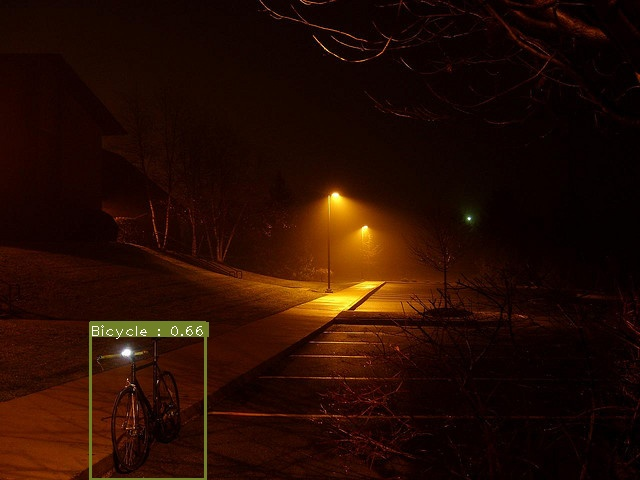

In [32]:
from IPython.display import Image
Image(filename='output.jpg') 

In [33]:
img_path = "Monk_Object_Detection/example_notebooks/sample_dataset/dark_scenes_test/img2.png";
scores, labels, boxes = gtf.Predict(img_path, class_list, vis_threshold=0.3);

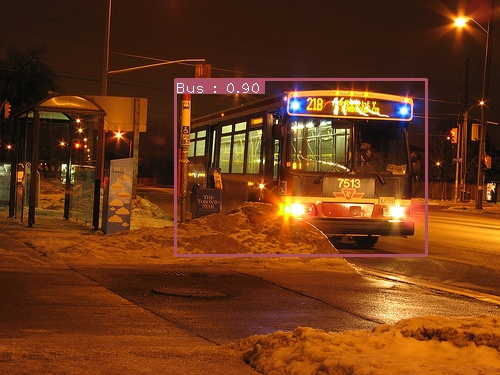

In [34]:
from IPython.display import Image
Image(filename='output.jpg') 

In [7]:
img_path = "Monk_Object_Detection/example_notebooks/sample_dataset/dark_scenes_test/img3.JPG";
scores, labels, boxes = gtf.Predict(img_path, class_list, vis_threshold=0.6);

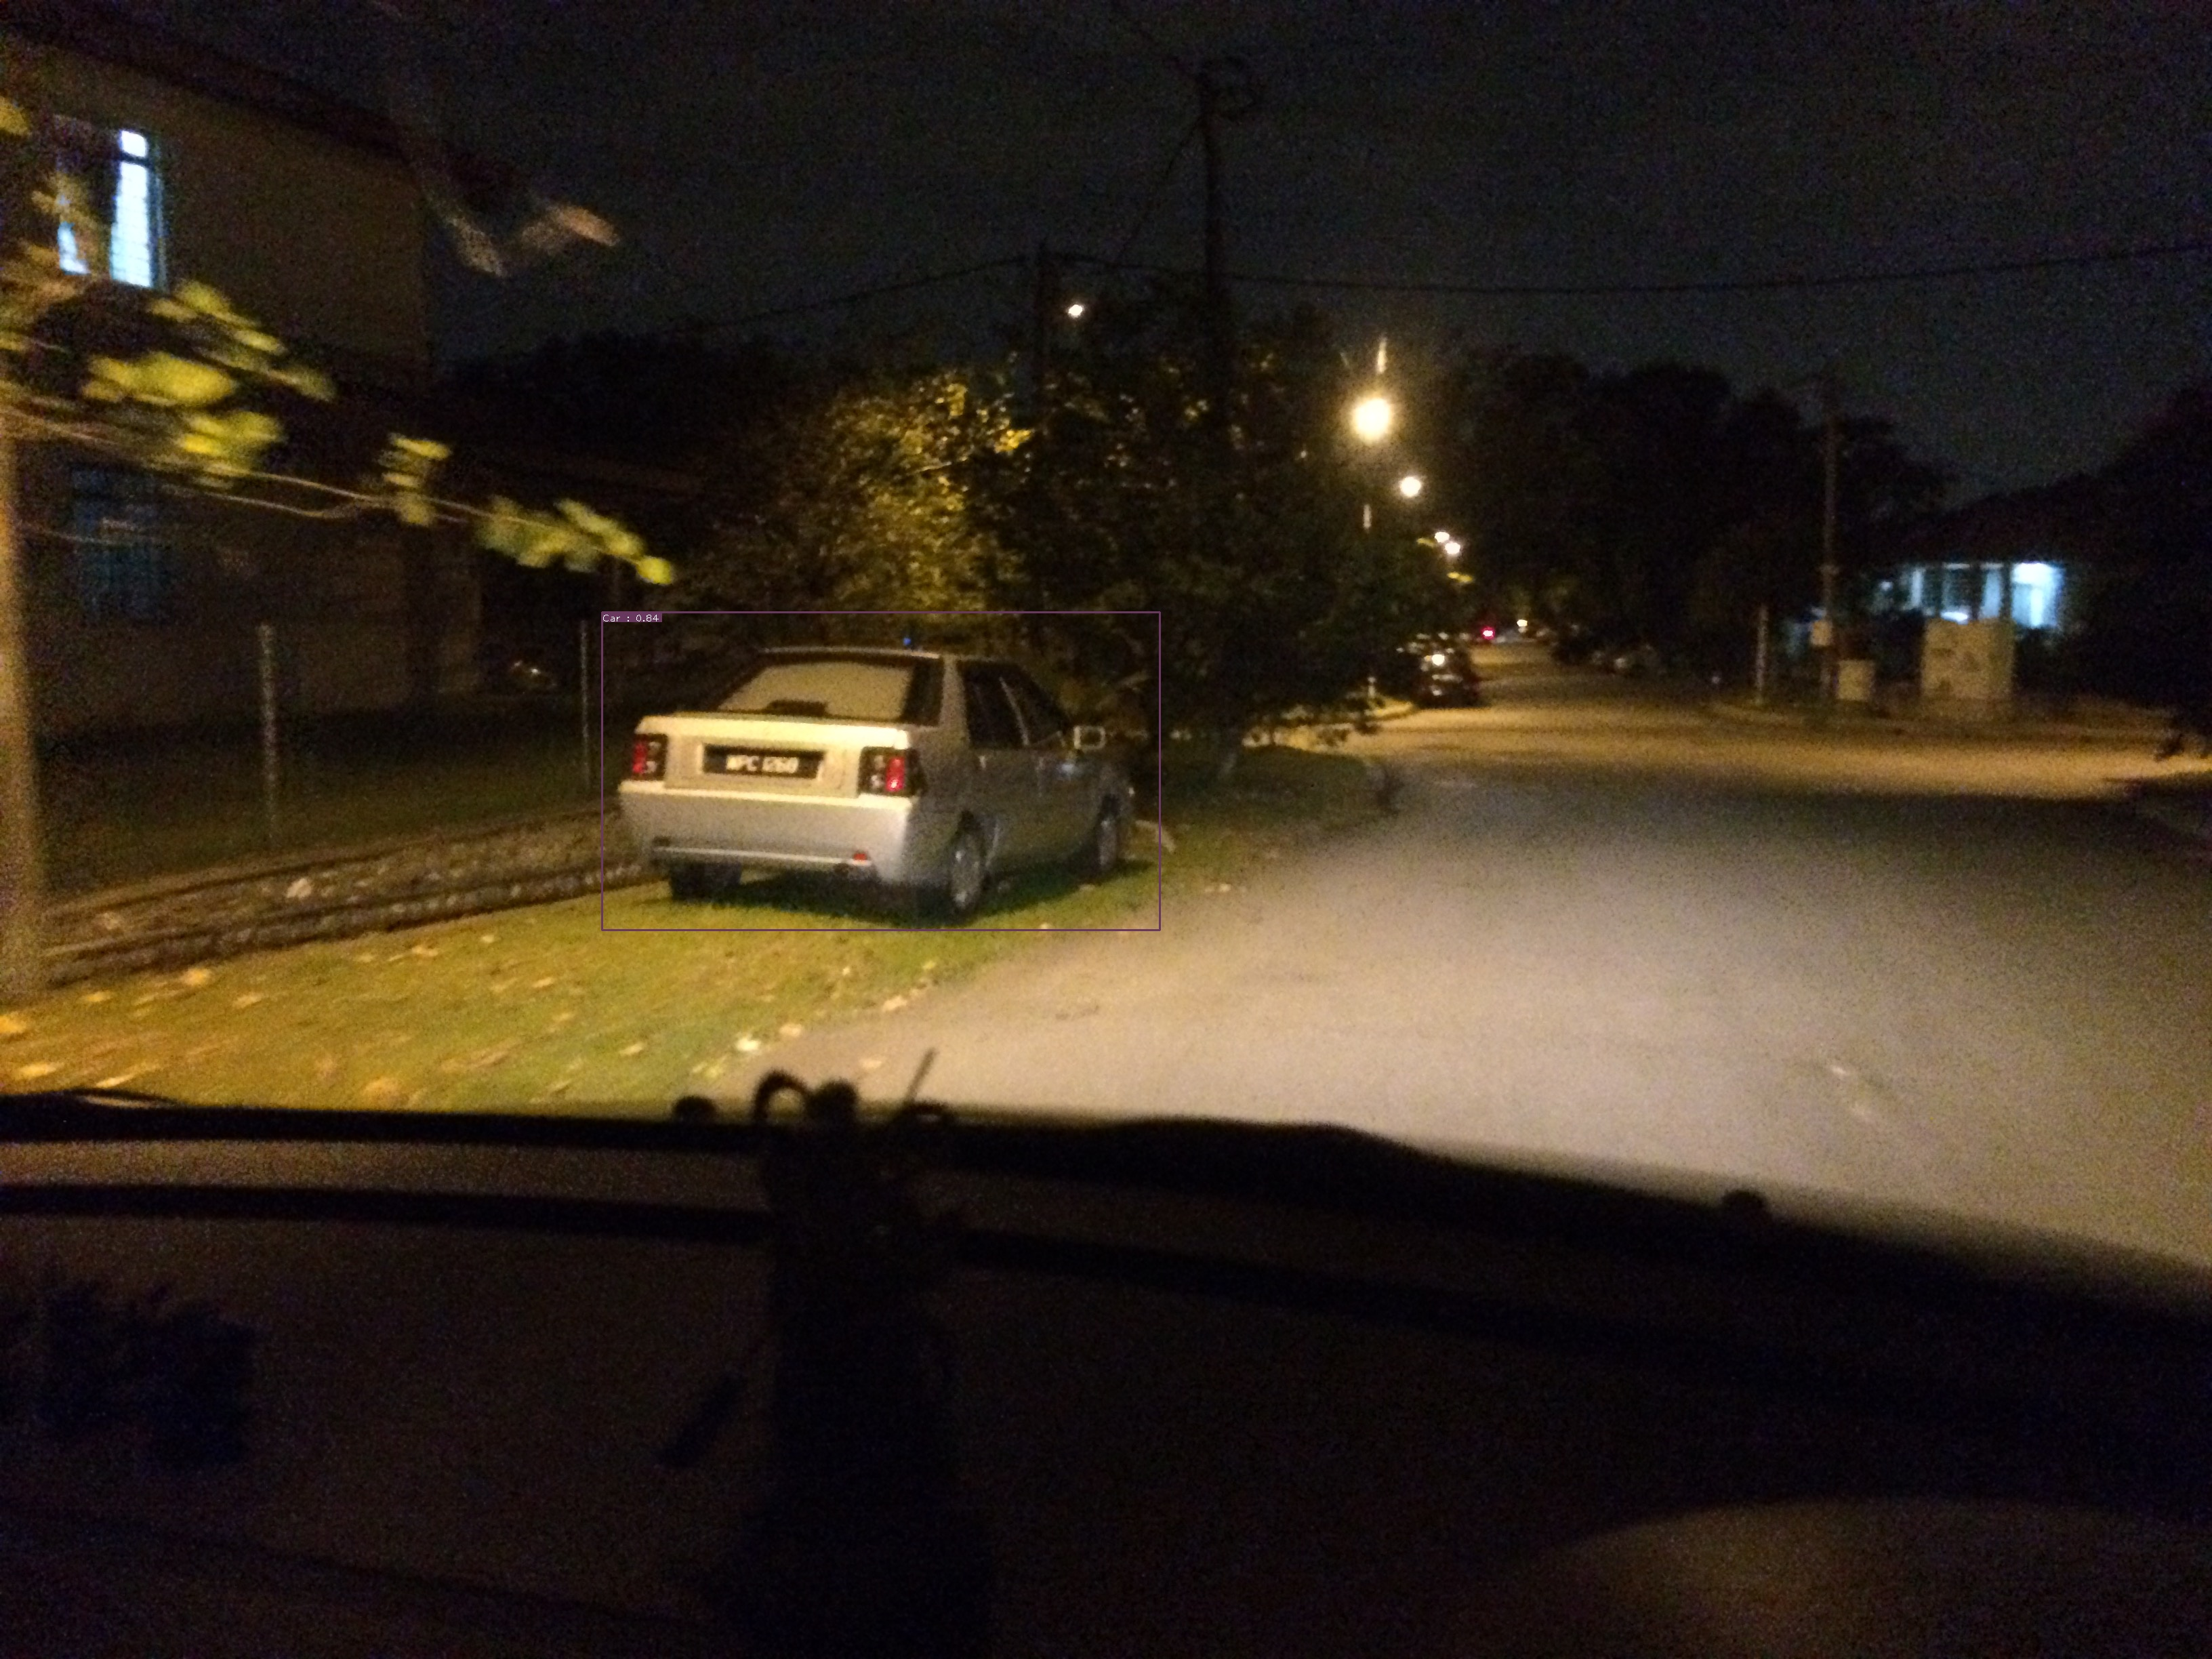

In [8]:
from IPython.display import Image
Image(filename='output.jpg') 

In [40]:
img_path = "Monk_Object_Detection/example_notebooks/sample_dataset/dark_scenes_test/img3.jpg";
scores, labels, boxes = gtf.Predict(img_path, class_list, vis_threshold=0.2);

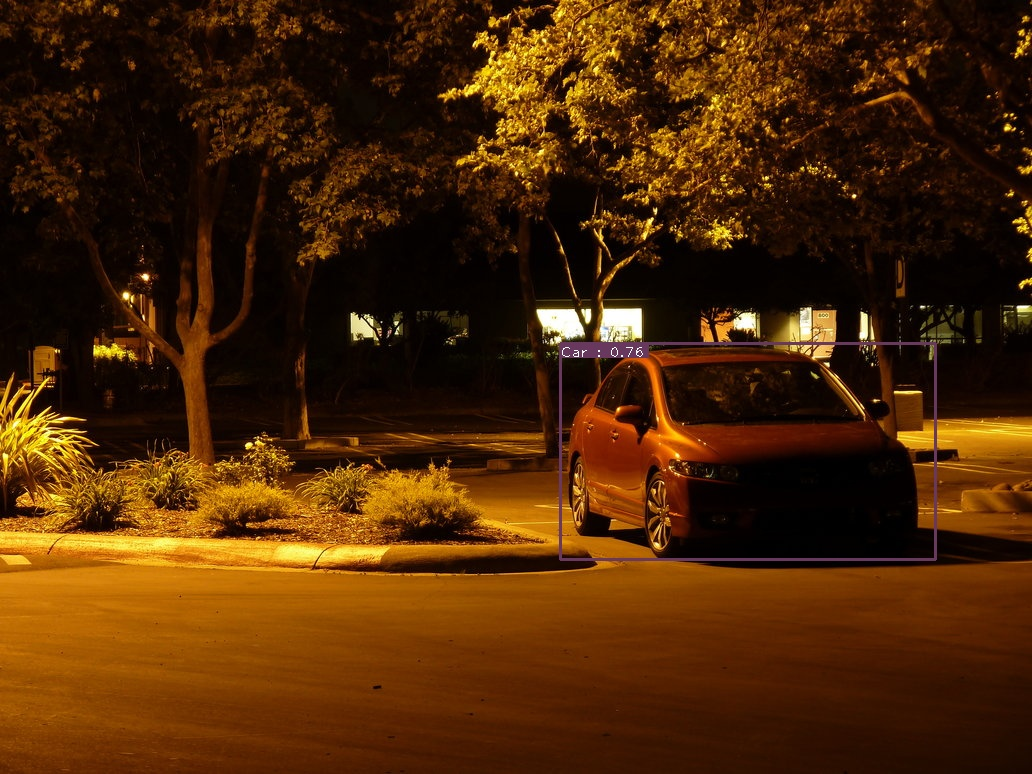

In [41]:
from IPython.display import Image
Image(filename='output.jpg') 

In [46]:
img_path = "Monk_Object_Detection/example_notebooks/sample_dataset/dark_scenes_test/img4.jpg";
scores, labels, boxes = gtf.Predict(img_path, class_list, vis_threshold=0.5);

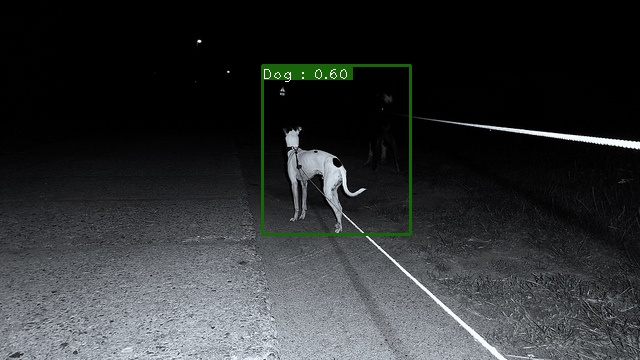

In [47]:
from IPython.display import Image
Image(filename='output.jpg') 

In [62]:
img_path = "Monk_Object_Detection/example_notebooks/sample_dataset/dark_scenes_test/img5.jpg";
scores, labels, boxes = gtf.Predict(img_path, class_list, vis_threshold=0.25);

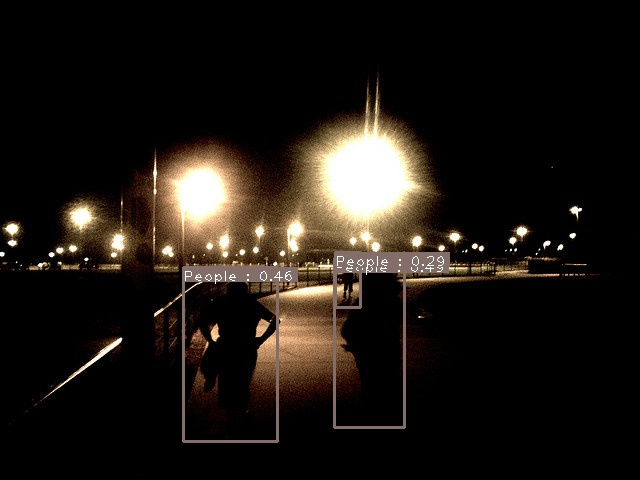

In [63]:
from IPython.display import Image
Image(filename='output.jpg') 

In [64]:
img_path = "Monk_Object_Detection/example_notebooks/sample_dataset/dark_scenes_test/img6.jpg";
scores, labels, boxes = gtf.Predict(img_path, class_list, vis_threshold=0.3);

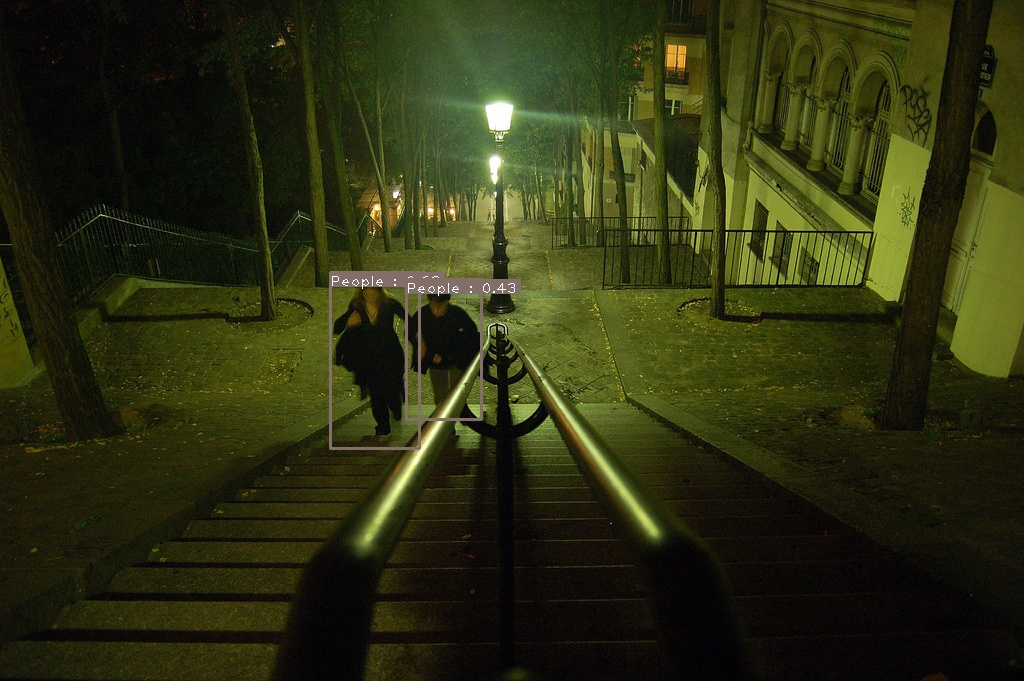

In [65]:
from IPython.display import Image
Image(filename='output.jpg') 

In [74]:
img_path = "Monk_Object_Detection/example_notebooks/sample_dataset/dark_scenes_test/img7.JPG";
scores, labels, boxes = gtf.Predict(img_path, class_list, vis_threshold=0.2);

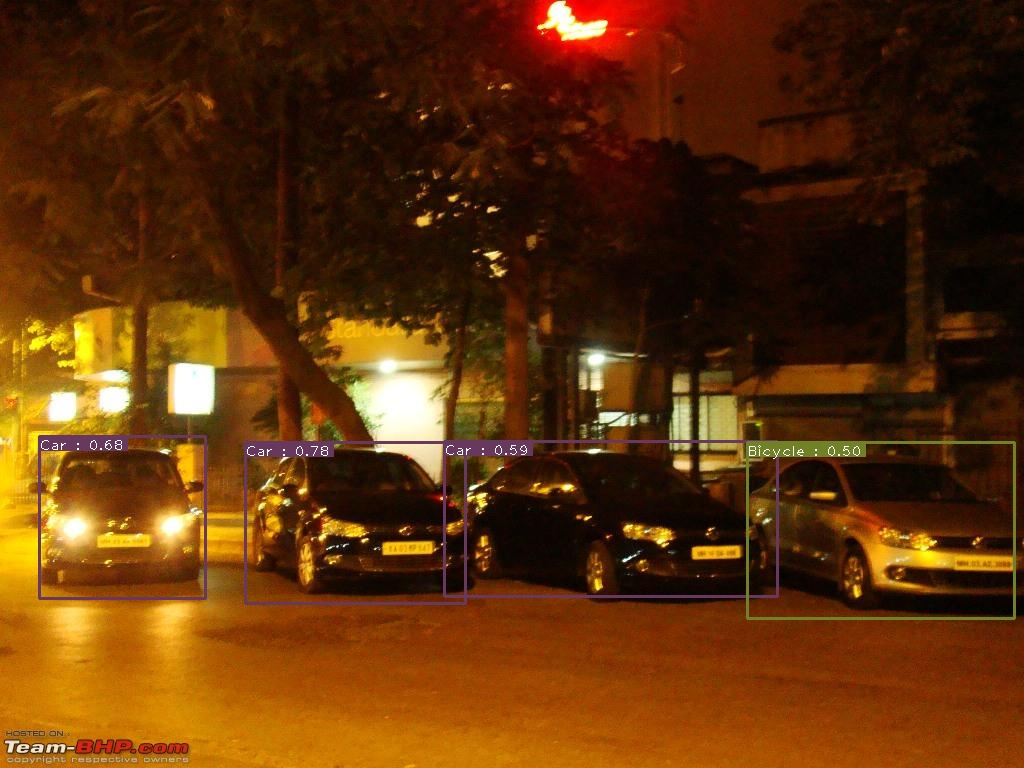

In [75]:
from IPython.display import Image
Image(filename='output.jpg') 

In [82]:
img_path = "Monk_Object_Detection/example_notebooks/sample_dataset/dark_scenes_test/img7.jpeg";
scores, labels, boxes = gtf.Predict(img_path, class_list, vis_threshold=0.55);

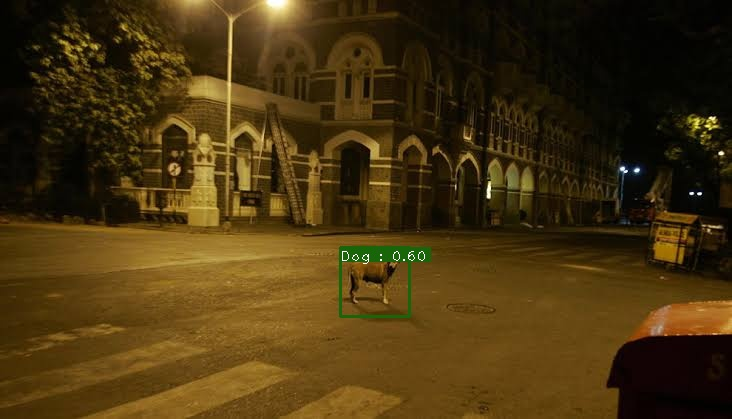

In [83]:
from IPython.display import Image
Image(filename='output.jpg') 

In [92]:
img_path = "Monk_Object_Detection/example_notebooks/sample_dataset/dark_scenes_test/img9.jpeg";
scores, labels, boxes = gtf.Predict(img_path, class_list, vis_threshold=0.25);

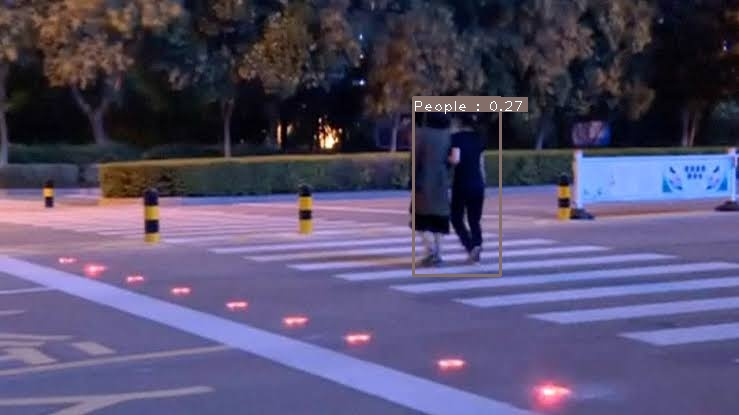

In [93]:
from IPython.display import Image
Image(filename='output.jpg')

In [106]:
img_path = "Monk_Object_Detection/example_notebooks/sample_dataset/dark_scenes_test/img10.jpeg";
scores, labels, boxes = gtf.Predict(img_path, class_list, vis_threshold=0.4);

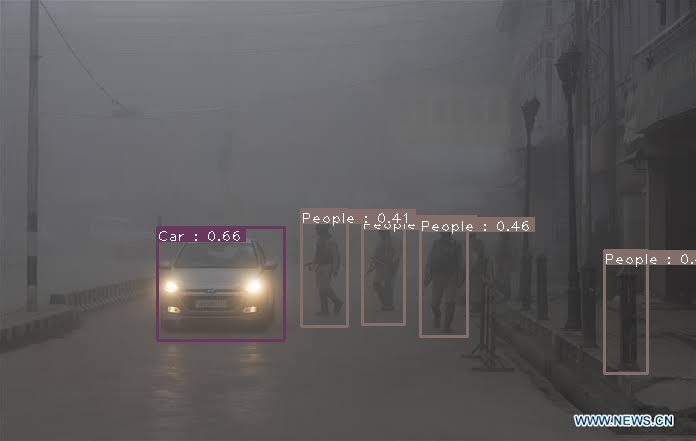

In [107]:
from IPython.display import Image
Image(filename='output.jpg')

In [11]:
img_path = "Monk_Object_Detection/example_notebooks/sample_dataset/dark_scenes_test/img11.jpeg";
scores, labels, boxes = gtf.Predict(img_path, class_list, vis_threshold=0.3);

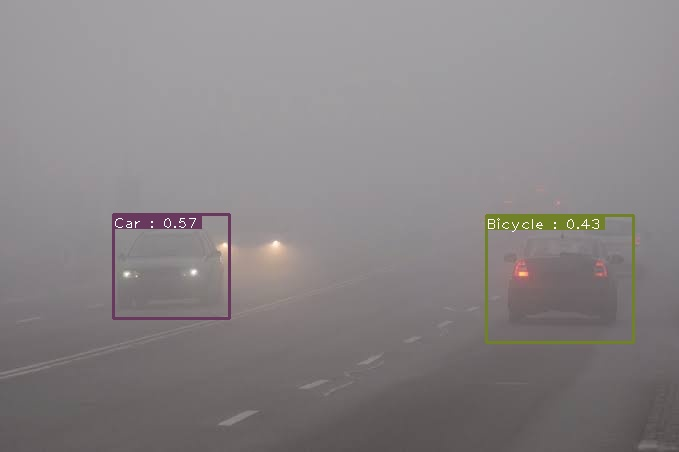

In [12]:
from IPython.display import Image
Image(filename='output.jpg')

In [114]:
img_path = "Monk_Object_Detection/example_notebooks/sample_dataset/dark_scenes_test/img12.jpeg";
scores, labels, boxes = gtf.Predict(img_path, class_list, vis_threshold=0.2);

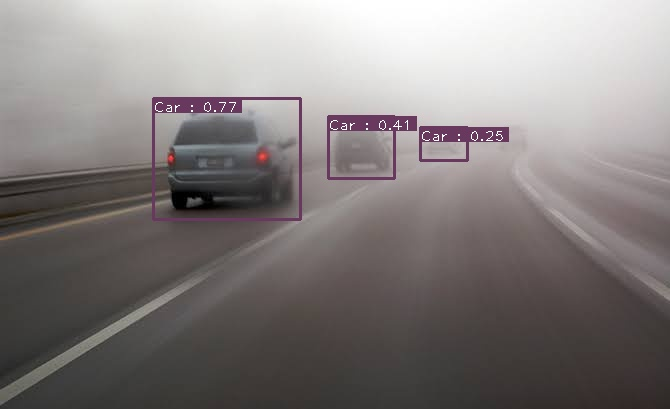

In [115]:
from IPython.display import Image
Image(filename='output.jpg')

In [126]:
img_path = "Monk_Object_Detection/example_notebooks/sample_dataset/dark_scenes_test/img13.jpeg";
scores, labels, boxes = gtf.Predict(img_path, class_list, vis_threshold=0.21);

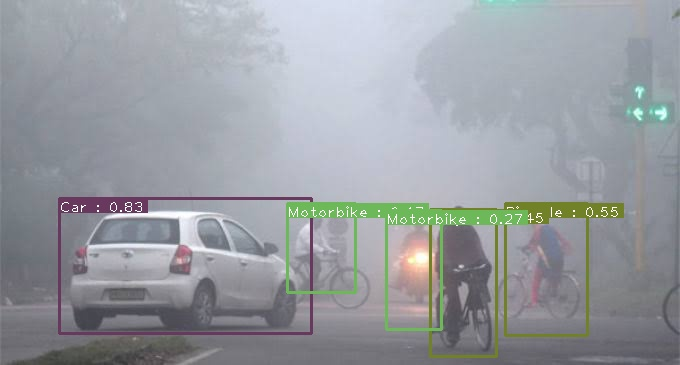

In [127]:
from IPython.display import Image
Image(filename='output.jpg')

In [130]:
img_path = "Monk_Object_Detection/example_notebooks/sample_dataset/dark_scenes_test/img14.jpeg";
scores, labels, boxes = gtf.Predict(img_path, class_list, vis_threshold=0.3);

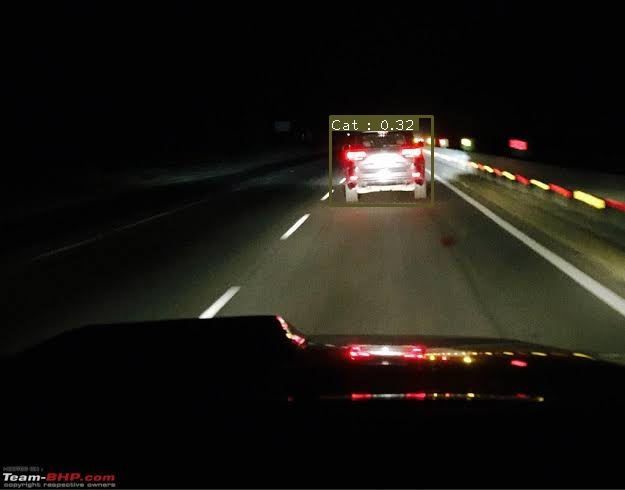

In [131]:
from IPython.display import Image
Image(filename='output.jpg')

In [150]:
img_path = "Monk_Object_Detection/example_notebooks/sample_dataset/dark_scenes_test/img15.jpeg";
scores, labels, boxes = gtf.Predict(img_path, class_list, vis_threshold=0.2);

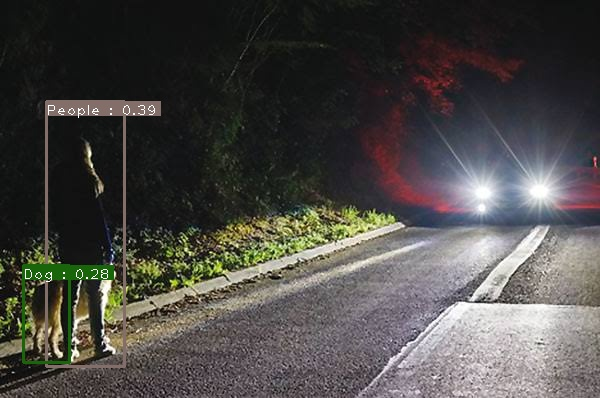

In [151]:
from IPython.display import Image
Image(filename='output.jpg')

In [154]:
img_path = "Monk_Object_Detection/example_notebooks/sample_dataset/dark_scenes_test/img16.jpeg";
scores, labels, boxes = gtf.Predict(img_path, class_list, vis_threshold=0.5);

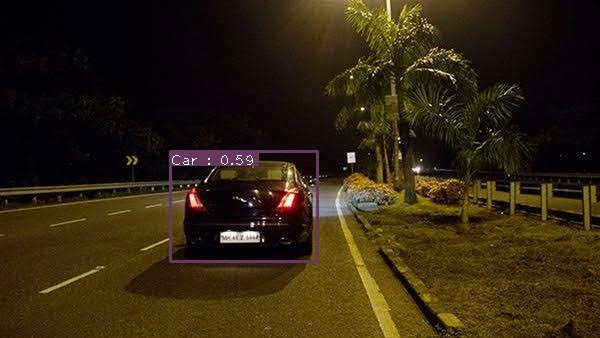

In [155]:
from IPython.display import Image
Image(filename='output.jpg')

In [15]:
img_path = "Monk_Object_Detection/example_notebooks/sample_dataset/dark_scenes_test/img17.jpeg";
scores, labels, boxes = gtf.Predict(img_path, class_list, vis_threshold=0.4);

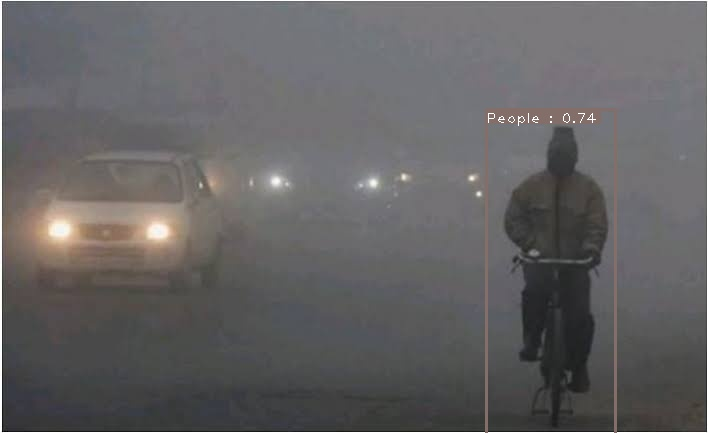

In [16]:
from IPython.display import Image
Image(filename='output.jpg')

In [164]:
img_path = "Monk_Object_Detection/example_notebooks/sample_dataset/dark_scenes_test/img18.jpg";
scores, labels, boxes = gtf.Predict(img_path, class_list, vis_threshold=0.25);

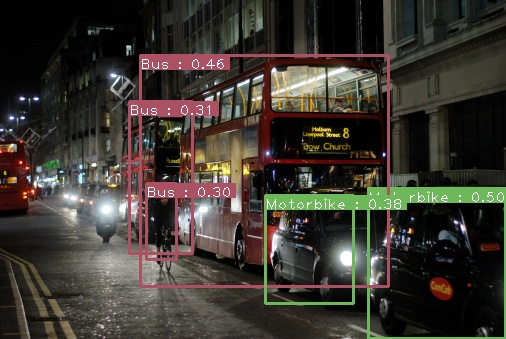

In [165]:
from IPython.display import Image
Image(filename='output.jpg')

In [170]:
img_path = "Monk_Object_Detection/example_notebooks/sample_dataset/dark_scenes_test/img19.jpg";
scores, labels, boxes = gtf.Predict(img_path, class_list, vis_threshold=0.4);

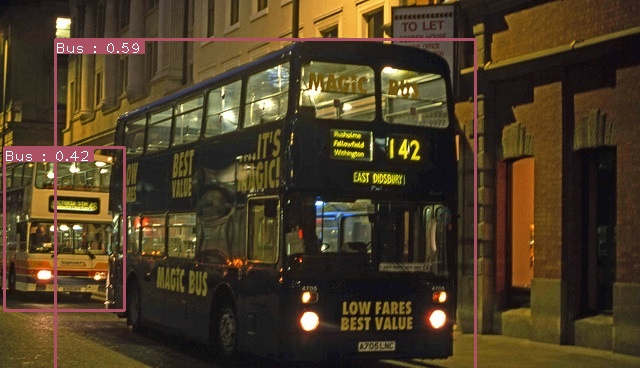

In [171]:
from IPython.display import Image
Image(filename='output.jpg')

In [172]:
img_path = "Monk_Object_Detection/example_notebooks/sample_dataset/dark_scenes_test/img20.jpg";
scores, labels, boxes = gtf.Predict(img_path, class_list, vis_threshold=0.4);

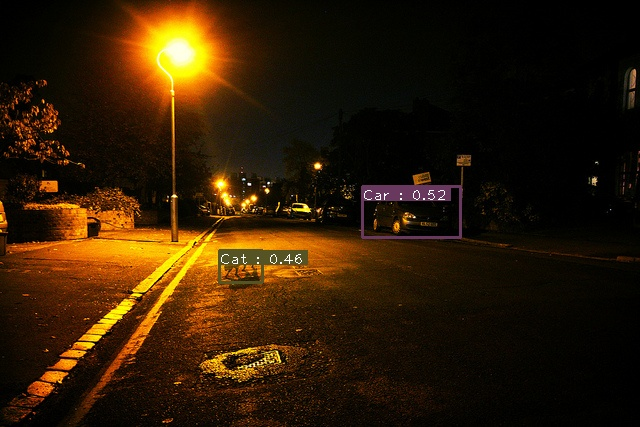

In [173]:
from IPython.display import Image
Image(filename='output.jpg')